# Global Financial Inclusion and Digital Payments – Exploratory Data Analysis

In this notebook, we conduct an in-depth exploratory and descriptive analysis of the **World Bank Global Findex Database 2021**, which captures how adults across the world save, borrow, make payments, and manage financial risk. This dataset is a cornerstone for understanding the **state of financial inclusion** globally, especially in the context of **digital financial services**.

The purpose of this analysis is to uncover trends, identify disparities, and lay the groundwork for statistical modeling and segmentation. By examining variables such as **account ownership**, **digital payment usage**, and **barriers to financial access**, we aim to draw attention to key demographic and regional patterns in financial inclusion. This analysis is especially relevant for policymakers, NGOs, and fintech innovators seeking data-driven insights into underserved populations.

We begin by importing essential Python libraries used for **data handling**, **numerical computation**, **visualization**, and **path management**:

- `pandas`: Used for data cleaning, transformation, filtering, and aggregation across multiple demographic and economic variables.
- `numpy`: Enables efficient numerical operations and basic statistics across quantitative fields.
- `os`: Helps with navigating file structures and ensuring consistent data access across devices or collaborators.
- `plotly.express`: A powerful visualization library used to generate clear, interactive visual summaries of patterns in financial behavior and inclusion metrics.
- `sklearn.preprocessing.StandardScaler`: Standardizes numerical data by centering and scaling, essential for machine learning algorithms.
- `sklearn.decomposition.PCA`: Implements Principal Component Analysis for dimensionality reduction and visualization of complex datasets.
- `sklearn.cluster.KMeans`: Applies k-means clustering to segment data into meaningful groups based on feature similarity.
- `gdown`: Utility to download files directly from Google Drive, enabling easy access to externally hosted datasets.

In [22]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import gdown
import warnings
warnings.filterwarnings('ignore')

## Dataset Structure and Variable Overview

The Global Findex dataset contains the following key columns, each playing a crucial role in understanding financial inclusion patterns across countries and years:

- **Country name**: The full name of the country where the data was collected (e.g., *Rwanda*, *India*, *Brazil*).
- **Country code**: A standardized 3-letter ISO code representing the country (e.g., *RWA*, *IND*, *BRA*). Useful for mapping and joining with external datasets.
- **Year**: The year of the survey. Available years include **2011**, **2014**, **2017**, and **2021**, allowing for temporal trend analysis.
- **Adult Population**: The estimated number of adults (aged 15+) in each country-year. This is used to contextualize indicator values and calculate population-weighted statistics.
- **Region**: Broad geographical classification assigned by the World Bank, such as *Sub-Saharan Africa*, *East Asia & Pacific*, or *Europe & Central Asia*.
- **Income group**: World Bank economic classification of countries into four tiers: *Low income*, *Lower-middle income*, *Upper-middle income*, and *High income*. This helps identify inclusion gaps based on development level.
- **Indicator**: Describes the specific financial behavior or access metric measured. Examples include *"Account (% age 15+)"*, *"Mobile money account (% age 15+)"*, and *"Made or received a digital payment (% age 15+)"*.
- **Indicator value**: The numeric percentage or proportion (ranging from 0 to 100) representing the population within the specified group that reported the behavior or access described in the `Indicator`.

These variables collectively enable powerful group-wise comparisons, trend analysis, and modeling of financial inclusion patterns across time, space, and demographic profiles.


## Loading the Cleaned Dataset

We load the cleaned version of the **Global Findex 2021** dataset into a Pandas DataFrame from the processed data directory. This dataset has been preprocessed to standardize column names, handle missing values, and retain only relevant records.

Using the `head(10)` function, we display the first ten rows to preview the dataset. This gives a snapshot of key variables such as `Year`, `Country name`,`country code` `Income group`,`Indicator`  `Adult population`, `region`, and `Indicator value`, which form the foundation for our exploratory analysis.


In [21]:
# Download and load data
file_id = '1CQOEn-YIGRwO_KUWBRD1myhExS7S2wI1'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'world.csv', quiet=False)

df = pd.read_csv('world.csv')
df["Indicator value"] = df["Indicator value"].astype(str).str.replace('%', '', regex=False).astype(float)
df

Downloading...
From (original): https://drive.google.com/uc?id=1CQOEn-YIGRwO_KUWBRD1myhExS7S2wI1
From (redirected): https://drive.google.com/uc?id=1CQOEn-YIGRwO_KUWBRD1myhExS7S2wI1&confirm=t&uuid=414e317a-ca42-4140-ae20-c81962feefa5
To: C:\Users\USER\OneDrive\Desktop\Financial inclusion\Notebooks\world.csv
100%|███████████████████████████████████████████████████████████████████████████████| 106M/106M [00:26<00:00, 4.04MB/s]


,Country name,Country code,Year,Adult Population,Region,Income group,Indicator,Indicator value
0,Afghanistan,AFG,2011,15124473.00,South Asia,Low income,Account (% age 15+),9.01
1,Afghanistan,AFG,2014,17300802.00,South Asia,Low income,Account (% age 15+),9.96
2,Afghanistan,AFG,2017,19718214.00,South Asia,Low income,Account (% age 15+),14.89
3,Afghanistan,AFG,2021,22647496.00,South Asia,Low income,Account (% age 15+),9.65
4,Albania,ALB,2011,2258899.75,Europe & Central Asia,Upper middle income,Account (% age 15+),28.27
...,...,...,...,...,...,...,...,...
677420,Zambia,ZMB,2021,10291819.00,Sub-Saharan Africa,Lower middle income,Used a mobile phone or the internet to access ...,NaN
677421,Zimbabwe,ZWE,2011,7414228.00,Sub-Saharan Africa,Lower middle income,Used a mobile phone or the internet to access ...,NaN
677422,Zimbabwe,ZWE,2014,7712326.00,Sub-Saharan Africa,Lower middle income,Used a mobile phone or the internet to access ...,NaN
677423,Zimbabwe,ZWE,2017,8044282.00,Sub-Saharan Africa,Lower middle income,Used a mobile phone or the internet to access ...,48.87


## Summary Statistics of Key Variables


In [ ]:
df.describe()

We computed basic summary statistics for three key numerical variables in the Global Findex dataset: `Year`, `Adult Population`, and `Indicator value`.

The data spans four survey years: **2011**, **2014**, **2017**, and **2021**. The average year across all entries is approximately 2017.9, with a standard deviation of about 3.34 years.

The `Adult Population` variable shows substantial variation, with the smallest country-year adult population just under **230,000** and the largest over **1.15 billion**, reflecting the inclusion of both small and highly populous countries. The average adult population per record is approximately **38.3 million**.

The `Indicator value`—which represents percentages for various financial inclusion metrics—ranges from **0% to 100%**, with a mean value around **27.7%**. This wide range highlights the diversity in financial service access and usage across countries, income groups, and demographic segments.

Overall, these summary statistics give us an initial sense of the dataset’s scope and variability, setting the stage for deeper exploration into trends, disparities, and influencing factors.


## Financial Inclusion Trend (2011–2021)

- **Global Growth**  
  Financial inclusion indicators—such as account ownership, digital payments, and mobile money—have steadily improved worldwide from 2011 to 2021.

- **Digital Payments Lead the Way**  
  The largest global increase is in digital payments, reflecting the rising importance of mobile and online platforms in financial ecosystems.

- **Regional Patterns**  
  - **Sub-Saharan Africa** leads with high and growing mobile money usage, outpacing many other regions.  
  - While regional disparities remain, all regions show improvement over time.

- **🇷🇼 Rwanda’s Strong Performance**  
  - Rwanda’s digital financial inclusion has grown faster than the global average.  
  - Notable growth areas include:  
    - Mobile money account (% age 15+)  
    - Made or received a digital payment (% age 15+)

- **Financial Institutions Lag in Some Areas**  
  Traditional financial institution accounts are increasing but at a slower pace compared to mobile and digital services.

---

These findings highlight the transformative impact of technology in closing the financial inclusion gap, with Rwanda as a leading regional example.


In [10]:
green_palette_9 = [
    "#144d14", "#4c9c54", "#7ac943", "#53a318",
    "#3d8910", "#2f6f0b", "#255d08", "#1a4505", "#113002"
]

df["Indicator value"] = df["Indicator value"].astype(str).str.replace('%', '').astype(float)

key_indicators = [
    "Account (% age 15+)",
    "Financial institution account (% age 15+)",
    "Mobile money account (% age 15+)",
    "Made or received a digital payment (% age 15+)"
]

df_filtered = df[
    (df["Indicator"].isin(key_indicators)) &
    (df["Year"].isin([2011, 2014, 2017, 2021]))
].copy()

for indicator in key_indicators:
    print(f"Plotting: {indicator}")

    df_ind = df_filtered[df_filtered["Indicator"] == indicator]

    # Global trend
    global_avg = df_ind.groupby("Year")["Indicator value"].mean().reset_index()
    rwanda = df_ind[df_ind["Country name"] == "Rwanda"]

    # Create the global line using the first green color
    fig_global = px.line(global_avg, x="Year", y="Indicator value", markers=True,
                         title=f"🌍 Global Trend — {indicator}",
                         labels={"Indicator value": "%"},
                         color_discrete_sequence=[green_palette_9[0]])  # Use first green color

    if not rwanda.empty:
        fig_global.add_scatter(
            x=rwanda["Year"], y=rwanda["Indicator value"],
            mode='lines+markers', name="Rwanda",
            line=dict(color='blue', width=4), marker=dict(size=10)
        )

    fig_global.show()

    # Regional trend
    region_avg = df_ind.groupby(["Region", "Year"])["Indicator value"].mean().reset_index()

    # Use green palette for regions, cycling colors if more regions than palette colors
    region_names = region_avg["Region"].unique()
    color_map = {region: green_palette_9[i % len(green_palette_9)] for i, region in enumerate(region_names)}

    fig_regional = px.line(region_avg, x="Year", y="Indicator value", color="Region", markers=True,
                           title=f"🌍 Regional Trend — {indicator}",
                           labels={"Indicator value": "%"},
                           color_discrete_map=color_map)  # Map regions to greens

    if not rwanda.empty:
        fig_regional.add_scatter(
            x=rwanda["Year"], y=rwanda["Indicator value"],
            mode='lines+markers', name="Rwanda",
            line=dict(color='blue', width=4, dash='dash'), marker=dict(size=6)
        )

    fig_regional.show()


Plotting: Account (% age 15+)


Plotting: Financial institution account (% age 15+)


Plotting: Mobile money account (% age 15+)


Plotting: Made or received a digital payment (% age 15+)


## How do demographics affect financial account ownership and digital financial service usage?

### Key Points

- Financial inclusion drives economic growth and poverty reduction.  
- Access to affordable financial services improves individual and community well-being.  
- Age, gender, education, and income significantly influence account ownership and digital service use.  
- Understanding these factors helps shape effective inclusion policies.  
- This study highlights demographic impacts and barriers to access, guiding targeted support for underserved groups.


In [12]:
# Define keywords for Digital Financial Services
dfs_keywords = [
    "mobile money", "digital payment", "internet", "online", "send money",
    "receive money", "used a mobile phone", "used the internet",
    "e-wallet", "used a mobile", "credit", "debit"
]

# Function to assign types
def assign_type(indicator):
    if pd.isna(indicator):
        return "Other"
    indicator_lower = indicator.lower()
    if "account" in indicator_lower:
        return "Account"
    if any(k in indicator_lower for k in dfs_keywords):
        return "Digital Financial Service Usage"
    return "Other"

df["Type"] = df["Indicator"].apply(assign_type)

account_df = df[df["Type"] == "Account"].copy()
dfs_df = df[df["Type"] == "Digital Financial Service Usage"].copy()

new_account = account_df.copy()
new_dfs = dfs_df.copy()
new_account["Indicator"] = new_account["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)
new_dfs["Indicator"] = new_dfs["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)

account_data = {
    "Age": account_df[account_df["Indicator"].str.contains("Age", case=False, na=False)],
    "Gender": new_account[new_account["Indicator"].str.contains("female|male", case=False, na=False)],
    "Education": new_account[new_account["Indicator"].str.contains("Education", case=False, na=False)],
    "Income": new_account[new_account["Indicator"].str.contains("Income", case=False, na=False)],
}

dfs_data = {
    "Age": dfs_df[dfs_df["Indicator"].str.contains("Age", case=False, na=False)],
    "Gender": new_dfs[new_dfs["Indicator"].str.contains("female|male", case=False, na=False)],
    "Education": new_dfs[new_dfs["Indicator"].str.contains("Education", case=False, na=False)],
    "Income": new_dfs[new_dfs["Indicator"].str.contains("Income", case=False, na=False)],
}

In [13]:
# Define demographic regex patterns
age_pattern = r"\b(age[s]?\s*\d{2}(?:-\d{2}|\+)|young|older)\b"
gender_pattern = r"\b(male|female)\b"
education_pattern = r"(primary education|secondary education|tertiary education|no formal education|less than primary)"
income_pattern = r"(poorest\s*\d+%|richest\s*\d+%|middle\s*\d+%)"

# dfs keywords & assign_type function assumed to be already defined from your setup

# Filter account and dfs data
account_df = df[df["Type"] == "Account"].copy()
dfs_df = df[df["Type"] == "Digital Financial Service Usage"].copy()

# Exclude saving and borrowing indicators from account and dfs data
saving_keywords = ["save", "saved"]
borrowing_keywords = ["borrow", "borrowing", "loan", "borrowed"]

def exclude_saving_borrowing(df_):
    indicators_str = df_["Indicator"].astype(str)  # Ensure strings
    mask = ~indicators_str.str.contains('|'.join(saving_keywords + borrowing_keywords), case=False, na=False)
    return df_[mask].copy()

account_df = exclude_saving_borrowing(account_df)
dfs_df = exclude_saving_borrowing(dfs_df)


# Clean parentheses
account_df["Indicator"] = account_df["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)
dfs_df["Indicator"] = dfs_df["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)

# Filter saving and borrowing data with demographic filtering
def filter_saving(df_):
    return df_[df_["Indicator"].str.contains('|'.join(saving_keywords), case=False, na=False)]

def filter_borrowing(df_):
    return df_[df_["Indicator"].str.contains('|'.join(borrowing_keywords), case=False, na=False)]

saving_data = {
    "Gender": filter_saving(df[df["Indicator"].str.contains(gender_pattern, case=False, regex=True)]),
    "Education": filter_saving(df[df["Indicator"].str.contains(education_pattern, case=False, regex=True)]),
}

borrowing_data = {
    "Gender": filter_borrowing(df[df["Indicator"].str.contains(gender_pattern, case=False, regex=True)]),
    "Education": filter_borrowing(df[df["Indicator"].str.contains(education_pattern, case=False, regex=True)]),
}

# Clean parentheses for saving and borrowing data
for group_dict in [saving_data, borrowing_data]:
    for key in group_dict:
        group_dict[key]["Indicator"] = group_dict[key]["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)


## Financial account ownership

In [15]:
# Prepare Financial Account Ownership by Gender data
account_gender = account_df[account_df["Indicator"].str.contains(gender_pattern, case=False, regex=True)].copy()
account_gender["Indicator"] = account_gender["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)

# Summarize mean values by indicator
account_gender_summary = (
    account_gender.groupby("Indicator")["Indicator value"]
    .mean()
    .reset_index()
    .sort_values(by="Indicator value", ascending=True)
    .head(20)
)


In [16]:
import plotly.express as px

fig_account_gender = px.bar(
    account_gender_summary,
    x="Indicator value",
    y="Indicator",
    orientation="h",
    color_discrete_sequence=["#276749"],
    labels={"Indicator value": "Average %", "Indicator": "Financial Account Ownership Indicator"}
)
fig_account_gender.update_layout(
    title="Financial Account Ownership by Gender",
    title_x=0.5,
    title_font=dict(size=20, family='Lato, sans-serif', color='#144d14', weight='bold')
)
fig_account_gender.show()


**Traditional Accounts**  
Men are more likely to have a traditional account with a financial institution, suggesting a gender gap in formal banking.

**Overall Accounts**  
However, the total number of accounts held is fairly similar between men and women, indicating that other types of accounts (like mobile money) are balancing the disparity in formal banking.

**Digital Access**  
Men show a slightly higher rate of using digital tools (mobile phone or internet) to access an account, but the difference is not as pronounced as in other areas, suggesting that digital access is a critical area for both genders.

**Inactive Accounts**  
The data shows that a slightly higher percentage of women have inactive accounts compared to men, which may point to challenges in sustained engagement with financial services.


In [18]:
# Prepare Financial Account Ownership by Education data
account_education = account_df[account_df["Indicator"].str.contains(education_pattern, case=False, regex=True)].copy()
account_education["Indicator"] = account_education["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)

account_education_summary = (
    account_education.groupby("Indicator")["Indicator value"]
    .mean()
    .reset_index()
    .sort_values(by="Indicator value", ascending=True)
    .head(20)
)


In [19]:
fig_account_education = px.bar(
    account_education_summary,
    x="Indicator value",
    y="Indicator",
    orientation="h",
    color_discrete_sequence=["#276749"],
    labels={"Indicator value": "Average %", "Indicator": "Financial Account Ownership Indicator"}
)
fig_account_education.update_layout(
    title="Financial Account Ownership by Education",
    title_x=0.5,
    title_font=dict(size=20, family='Lato, sans-serif', color='#144d14', weight='bold')
)
fig_account_education.show()


**Traditional Accounts:**  
Individuals with secondary education or more are significantly more likely to own an account with a financial institution compared to those with primary education or less.

**Digital Access:**  
The data also shows that people with a higher education level have a much greater rate of using digital tools and mobile money accounts, suggesting that education may play a role in the adoption of new financial technologies.

**Overall Access:**  
The overall ownership of any type of account is considerably higher for those with more education, reinforcing the link between education and financial inclusion.

**Inactive Accounts:**  
The percentage of inactive accounts is low for both groups, but it is slightly higher among those with primary education or less.


## Digital service usage 

In [22]:
# Prepare Digital Financial Service Usage by Gender data
dfs_gender = dfs_df[dfs_df["Indicator"].str.contains(gender_pattern, case=False, regex=True)].copy()
dfs_gender["Indicator"] = dfs_gender["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)

dfs_gender_summary = (
    dfs_gender.groupby("Indicator")["Indicator value"]
    .mean()
    .reset_index()
    .sort_values(by="Indicator value", ascending=True)
    .head(20)
)


In [23]:
fig_dfs_gender = px.bar(
    dfs_gender_summary,
    x="Indicator value",
    y="Indicator",
    orientation="h",
    color_discrete_sequence=["#276749"],
    labels={"Indicator value": "Average %", "Indicator": "Digital Financial Service Usage Indicator"}
)
fig_dfs_gender.update_layout(
    title="Digital Financial Service Usage by Gender",
    title_x=0.5,
    title_font=dict(size=20, family='Lato, sans-serif', color='#144d14', weight='bold')
)
fig_dfs_gender.show()


**Digital Payments:**  
The data shows that women are more likely than men to have made or received a digital payment. This suggests that digital platforms are a significant part of women's financial lives.

**Debit and Credit Cards:**  
While men slightly lead in the ownership of debit cards, the overall ownership of debit or credit cards is fairly balanced between genders.

**Online Commerce and Bill Payments:**  
Men are slightly more likely to use a mobile phone or the internet to pay bills or buy something online. This indicates a small but notable gap in digital commerce engagement.

**Credit Card Ownership:**  
The chart reveals a clear gender gap in credit card ownership, with a significantly higher percentage of men owning credit cards compared to women. This points to a disparity in access to formal credit.


In [25]:
# Prepare Digital Financial Service Usage by Education data
dfs_education = dfs_df[dfs_df["Indicator"].str.contains(education_pattern, case=False, regex=True)].copy()
dfs_education["Indicator"] = dfs_education["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)

dfs_education_summary = (
    dfs_education.groupby("Indicator")["Indicator value"]
    .mean()
    .reset_index()
    .sort_values(by="Indicator value", ascending=True)
    .head(20)
)


In [26]:
fig_dfs_education = px.bar(
    dfs_education_summary,
    x="Indicator value",
    y="Indicator",
    orientation="h",
    color_discrete_sequence=["#276749"],
    labels={"Indicator value": "Average %", "Indicator": "Digital Financial Service Usage Indicator"}
)
fig_dfs_education.update_layout(
    title="Digital Financial Service Usage by Education",
    title_x=0.5,
    title_font=dict(size=20, family='Lato, sans-serif', color='#144d14', weight='bold')
)
fig_dfs_education.show()


**Digital Payments:**  
The data shows a clear trend: a significantly higher percentage of people with secondary education or more have made or received a digital payment compared to those with primary education or less.

**Debit and Credit Cards:**  
Ownership of both debit and credit cards is considerably higher among the more educated group. This suggests that a higher education level is associated with greater integration into the formal financial system.

**Online Payments:**  
The chart also highlights a gap in online payments, with those who have less education being less likely to use a mobile phone or the internet to pay bills. This points to a need for targeted digital literacy programs.

**Key Takeaway:**  
Overall, the visual demonstrates that higher education is a strong predictor of digital financial service adoption and usage.


## saving behaviour

In [29]:
# Prepare Saving Behavior by Gender data
saving_gender = saving_data["Gender"].copy()
saving_gender["Indicator"] = saving_gender["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)

saving_gender_summary = (
    saving_gender.groupby("Indicator")["Indicator value"]
    .mean()
    .reset_index()
    .sort_values(by="Indicator value", ascending=True)
    .head(20)
)


In [30]:
fig_saving_gender = px.bar(
    saving_gender_summary,
    x="Indicator value",
    y="Indicator",
    orientation="h",
    color_discrete_sequence=["#276749"],
    labels={"Indicator value": "Average %", "Indicator": "Saving Behavior Indicator"}
)
fig_saving_gender.update_layout(
    title="Saving Behavior by Gender",
    title_x=0.5,
    title_font=dict(size=20, family='Lato, sans-serif', color='#144d14', weight='bold')
)
fig_saving_gender.show()


**Overall Saving Rates:**  
The chart indicates that a higher percentage of women (over 50%) than men report having saved any money, suggesting women are more inclined to save.

**Formal vs. Informal Savings:**  
Women are more likely to save in a formal way, such as at a financial institution or using a mobile money account. In contrast, men are more likely to save for old age, but their overall saving behavior seems to lean more towards informal methods or specific goals.


## Borrowing behaviour

In [33]:
# Prepare Borrowing Behavior by Education data
borrowing_education = borrowing_data["Education"].copy()
borrowing_education["Indicator"] = borrowing_education["Indicator"].str.replace(r"\s*\(.*?\)", "", regex=True)

borrowing_education_summary = (
    borrowing_education.groupby("Indicator")["Indicator value"]
    .mean()
    .reset_index()
    .sort_values(by="Indicator value", ascending=True)
    .head(20)
)


In [34]:
fig_borrowing_education = px.bar(
    borrowing_education_summary,
    x="Indicator value",
    y="Indicator",
    orientation="h",
    color_discrete_sequence=["#276749"],
    labels={"Indicator value": "Average %", "Indicator": "Borrowing Behavior Indicator"}
)
fig_borrowing_education.update_layout(
    title="Borrowing Behavior by Education",
    title_x=0.5,
    title_font=dict(size=20, family='Lato, sans-serif', color='#144d14', weight='bold')
)
fig_borrowing_education.show()


**Overall Borrowing:**  
Individuals with a primary education or less are most likely to report borrowing any money.

**Informal Borrowing:**  
There is a clear pattern of informal borrowing among those with less education, particularly from family and friends. This type of borrowing is more common for those with primary education or less.

**Formal Borrowing:**  
Individuals with secondary education or more show a higher rate of borrowing from formal financial institutions and are more likely to have an outstanding housing loan.


## Barriers to financial inclusion

In [37]:
# Clean barrier indicator function
def clean_barrier_indicator(indicator):
    if pd.isna(indicator) or str(indicator).strip() == "":
        return None

    text = str(indicator).lower()

    # Remove suffixes like (% age 15+)
    for suffix in [
        "(% without an account 15 +)", "(% without an account age 15+)",
        "(% age 15+ without an account)", "(% age 15+)"
    ]:
        text = text.replace(suffix, "")

    text = text.replace("because", "")
    text = text.replace("due to", "")
    text = text.replace("reason for", "")
    text = text.strip()

    replacements = {
        "insufficient funds": "Insufficient Funds",
        "lack of money": "Lack of Money",
        "too far": "Too Far from Institution",
        "too expensive": "Too Expensive",
        "lack of documentation": "No ID / Documentation",
        "lack of trust": "Distrust Institutions",
        "religious reasons": "Religious Reasons",
        "religion": "Religious Reasons",
        "family member has account": "Family Member Has Account",
        "family member has": "Family Member Has Account",
        "do not need": "No Need",
        "not useful": "Not Useful",
        "no need": "No Need",
        "do not trust financial institutions": "Distrust Institutions",
        "do not trust": "Distrust Institutions",
        "no account": "No Account"
    }

    for phrase, short in replacements.items():
        if phrase in text:
            return short

    return text.title()


barrier_keywords = (
    "barrier|reason for not having an account|no account|lack of money|too expensive|too far|"
    "family member has|lack of documentation|lack of trust|religious|no need|not useful|"
    "do not trust financial institutions"
)

df_barriers = df[df["Indicator"].str.contains(barrier_keywords, case=False, regex=True)].copy()
df_barriers["Clean Indicator"] = df_barriers["Indicator"].apply(clean_barrier_indicator)
df_barriers = df_barriers[df_barriers["Clean Indicator"].notna() & (df_barriers["Clean Indicator"] != "")]
df_barriers = df_barriers[df_barriers["Indicator value"].notna() & (df_barriers["Indicator value"] != "")]


In [38]:
def get_barriers_fig(region=None, income=None, country=None, title="Barriers to Financial Inclusion"):
    filtered = df_barriers.copy()
    if region: filtered = filtered[filtered["Region"] == region]
    if income: filtered = filtered[filtered["Income group"] == income]
    if country: filtered = filtered[filtered["Country name"] == country]
    
    if filtered.empty:
        fig = px.bar(title="No data available.")
    else:
        summary = filtered.groupby("Clean Indicator")["Indicator value"].mean().reset_index()
        fig = px.bar(
            summary.sort_values(by="Indicator value", ascending=True),
            x="Indicator value", y="Clean Indicator", orientation="h", color_discrete_sequence=["#1b4d20"]
        )
    
    fig.update_layout(
        title=title,
        title_x=0.5,
        title_font=dict(size=20, family='Lato, sans-serif', color='#144d14', weight='bold')
    )
    return fig


fig = get_barriers_fig()
fig.show()


**Financial Barriers:**  
The most significant barrier is insufficient funds, which is cited by over 50% of the respondents. This indicates that a lack of income is the single greatest obstacle to accessing financial services. The high percentage of people who say services are "too expensive" further supports this.

**Behavioral and Trust Barriers:**  
A notable portion of the population either feels they have "no need" for an account or "distrusts institutions." This suggests that simply providing access is not enough; there is also a need for financial education and building trust.

**Physical and Access Barriers:**  
While less common than financial and behavioral barriers, a significant number of people report that financial institutions are "too far from" them. This highlights a physical infrastructure problem that affects access.


## Market segmentation

In [48]:
def segment_countries_financial_inclusion(df, year, region=None, n_clusters=4):
    indicators = [
        "Account (% age 15+)",
        "Mobile money account (% age 15+)",
        "Made or received a digital payment (% age 15+)",
        "Saved at a financial institution (% age 15+)",
        "Borrowed from a financial institution (% age 15+)"
    ]
    df_year = df[(df['Year'] == year) & (df['Indicator'].isin(indicators))]
    if region:
        df_year = df_year[df_year['Region'] == region]
    df_pivot = df_year.pivot_table(index='Country name', columns='Indicator', values='Indicator value')
    if df_pivot.empty or df_pivot.shape[0] < n_clusters:
        return pd.DataFrame()
    df_pivot = df_pivot.dropna(thresh=int(0.5 * len(indicators)), axis=0)
    df_pivot.fillna(df_pivot.mean(), inplace=True)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df_pivot)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(pca_result)
    df_clustered = pd.DataFrame({
        'Country name': df_pivot.index,
        'PCA1': pca_result[:, 0],
        'PCA2': pca_result[:, 1],
        'Segment': clusters
    })
    return df_clustered

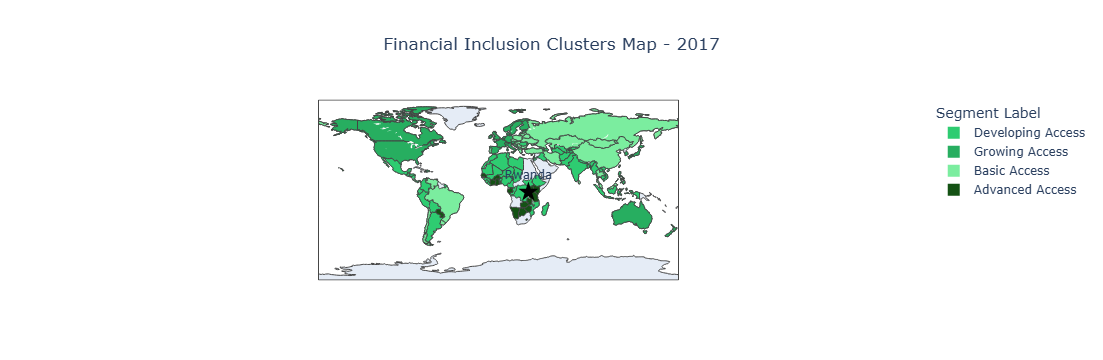

In [50]:
import plotly.graph_objects as go

year = 2017
df_segmented = segment_countries_financial_inclusion(df, year)
if df_segmented.empty:
    print("Not enough data to create cluster map.")
else:
    df_segmented["Segment Label"] = df_segmented["Segment"].map({
        0: "Basic Access",
        1: "Developing Access",
        2: "Growing Access",
        3: "Advanced Access"
    })
    color_map = {
        "Basic Access": "#7bed9f",    
        "Developing Access": "#2ecc71",  
        "Growing Access": "#27ae60",   
        "Advanced Access": "#145214" 
    }

    fig_map = px.choropleth(
        df_segmented,
        locations="Country name",
        locationmode='country names',
        color="Segment Label",
        hover_name="Country name",
        color_discrete_map=color_map,
        title=f"Financial Inclusion Clusters Map - {year}"
    )

    # Add black star marker for Rwanda using scattergeo with approximate coordinates
    fig_map.add_trace(go.Scattergeo(
        lon=[29.8739],  # Rwanda longitude approx
        lat=[-1.9403],  # Rwanda latitude approx
        mode='markers+text',
        marker=dict(
            size=15,
            color='black',
            symbol='star'
        ),
        text=["Rwanda"],
        textposition="top center",
        showlegend=False
    ))

    fig_map.update_layout(title_x=0.5)
    fig_map.show()


**Advanced Access:**  
A small number of countries, primarily in North America and Western Europe, fall into the Advanced Access category, indicating a high level of financial inclusion.

**Growing Access:**  
This category represents a significant number of countries across the globe, including parts of Eastern Europe and Southeast Asia. These regions show steady progress in financial inclusion, moving beyond basic access.

**Developing Access:**  
A large portion of the world, including parts of South America, Asia, and Africa, is classified as having Developing Access. This highlights that while progress is being made, there are still significant opportunities for growth in these regions.

**Basic Access:**  
The map shows that some regions, especially in Central Africa, have Basic Access, which means financial inclusion is still in its early stages.


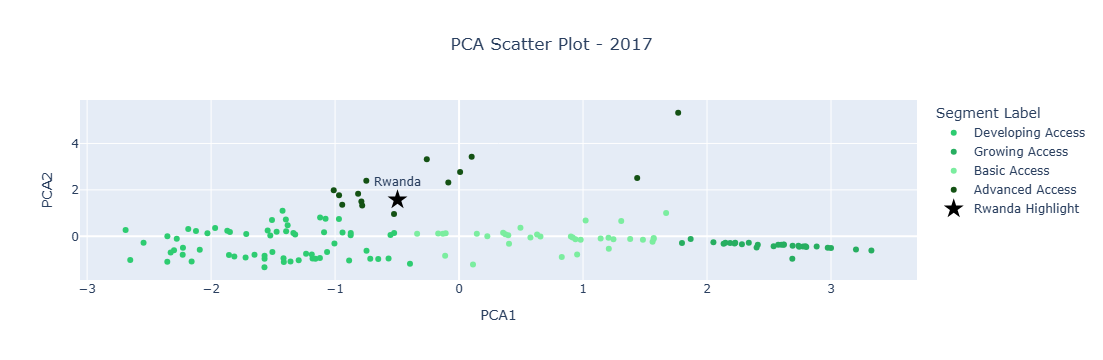

In [52]:
fig_scatter = px.scatter(df_segmented, x="PCA1", y="PCA2", color="Segment Label",
                         hover_name="Country name", color_discrete_map=color_map,
                         title=f"PCA Scatter Plot - {year}")

rwanda_row = df_segmented[df_segmented["Country name"].str.lower() == "rwanda"]
if not rwanda_row.empty:
    fig_scatter.add_scatter(
        x=rwanda_row["PCA1"],
        y=rwanda_row["PCA2"],
        mode='markers+text',
        text=["Rwanda"],
        textposition="top center",
        marker=dict(size=15, color='black', symbol='star'),
        name='Rwanda Highlight'
    )

fig_scatter.update_layout(title_x=0.5)
fig_scatter.show()


The PCA plot visualizes how countries are clustered based on their financial inclusion characteristics in 2014. The star on the plot highlights Rwanda, placing it within the Developing Access cluster, alongside many other countries with similar financial profiles at the time.

However, the timeline you provided demonstrates Rwanda's rapid progress. It shows a significant journey in a short period:

**2011:** Rwanda was at the Basic access stage.

**2014:** It had advanced to the Growing access stage.

**2017:** It reached the Advanced access stage, indicating a major leap in financial inclusion.


## Key Insights and Final Conclusions on Financial Inclusion

The analysis reveals that financial inclusion is a multi-faceted challenge with significant disparities. There is a clear gender divide, with men favoring traditional banking while women are more active in digital financial services. Education is a strong predictor of financial access, as those with higher education are more likely to use formal services and credit.

The primary barriers to inclusion are insufficient funds and the high cost of services, followed by a lack of trust in financial institutions.

The rapid progress of a country like Rwanda, which moved from Basic to Advanced Access in six years, serves as a powerful example. This highlights that targeted strategies focusing on both digital access and financial literacy are key to overcoming these barriers and achieving widespread financial inclusion.
